In [35]:
import numpy as np
import pandas as pd
import os

In [36]:
data = dict()
for qual in ["good", "bad"]:
    loc = "./data/raw-MS2/%s" % qual
    dfs = []
    for item in os.listdir(loc):
        try:
            x = item.split("_")[1:]
            name, ce, io, precursor = x
            io = io[0]
            df = pd.read_csv(loc + "/" + item)
            df["IO"] = io
            df["CE"] = int(ce)
            df["name"] = name
            df['precursor'] = float(precursor[:-4])
            dfs += [df]
            
        except:
            continue
    data[qual] = pd.concat(dfs)

In [37]:
data["bad"].CE = data["bad"].CE.astype(int)

In [38]:
data['good']['precursor']

0     219.008606
1     219.008606
2     219.008606
3     219.008606
4     219.008606
         ...    
94    278.211487
95    278.211487
96    278.211487
97    278.211487
98    278.211487
Name: precursor, Length: 51411, dtype: float64

In [39]:
data["bad"].dtypes

MS2.mz           float64
MS2.intensity    float64
IO                object
CE                 int32
name              object
precursor        float64
dtype: object

In [41]:
import pickle
with open("hrms-data", "wb") as f:
    pickle.dump(data, f)

In [42]:
df.name.unique()

array(['Venlafaxine'], dtype=object)

<AxesSubplot:xlabel='MS2.mz'>

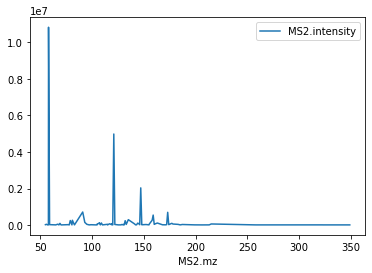

In [43]:
df = data["bad"]
subset = df[(df['name'] == "Venlafaxine")&(df["CE"] == 50)]
#subset[["coluamn"]].plot.hist(bins=100)
subset.plot(y="MS2.intensity", x="MS2.mz", style="-")

In [44]:
data["bad"]['MS2.mz'].describe()

count    38667.000000
mean       139.952265
std         75.676775
min         50.001041
25%         84.983730
50%        127.053810
75%        170.069405
max        747.369751
Name: MS2.mz, dtype: float64

<AxesSubplot:>

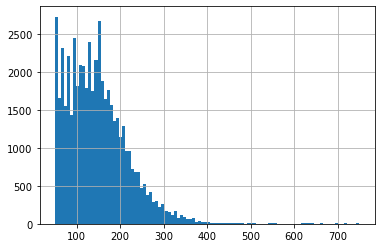

In [45]:
data["good"]['MS2.mz'].hist(bins=100)